Hi Everyone! I'm Mary Blessing Omotusi.

I'm building a machine learning model with the Iris Flower dataset.

Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [30]:
# Import my libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the Iris dataset: Features (X = sepal width,sepal length, petal width, petal length), Target variable (y = species)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [28]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Convert Array To DataFrame

Why? Arrays (like NumPy’s X and y) are great for computation but lack context. Converting to a DataFrame adds:

Readability: Column names (e.g., sepal length) make data self-documenting.

Functionality: Enables Pandas operations (e.g., .groupby(), .value_counts()).

Visualization: Works seamlessly with libraries like Seaborn (sns.pairplot()).

In [32]:
# Convert to DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:
#To remove any duplicated row, there is one duplicated row (150 rows was reduced to 149 rows)
iris_df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Performing Exploratory Data Analysis On The Dataset

In [34]:
iris_df.shape

(150, 5)

In [35]:
iris_df.describe ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Use Pairplot to Visualize Feature Relationships

Why? Pairplots visualize all pairwise relationships between features:

Patterns: Spot correlations (e.g., petal length vs. width).

Clustering: See how species separate (thanks to hue='species').

Efficiency: One plot replaces multiple scatterplots!

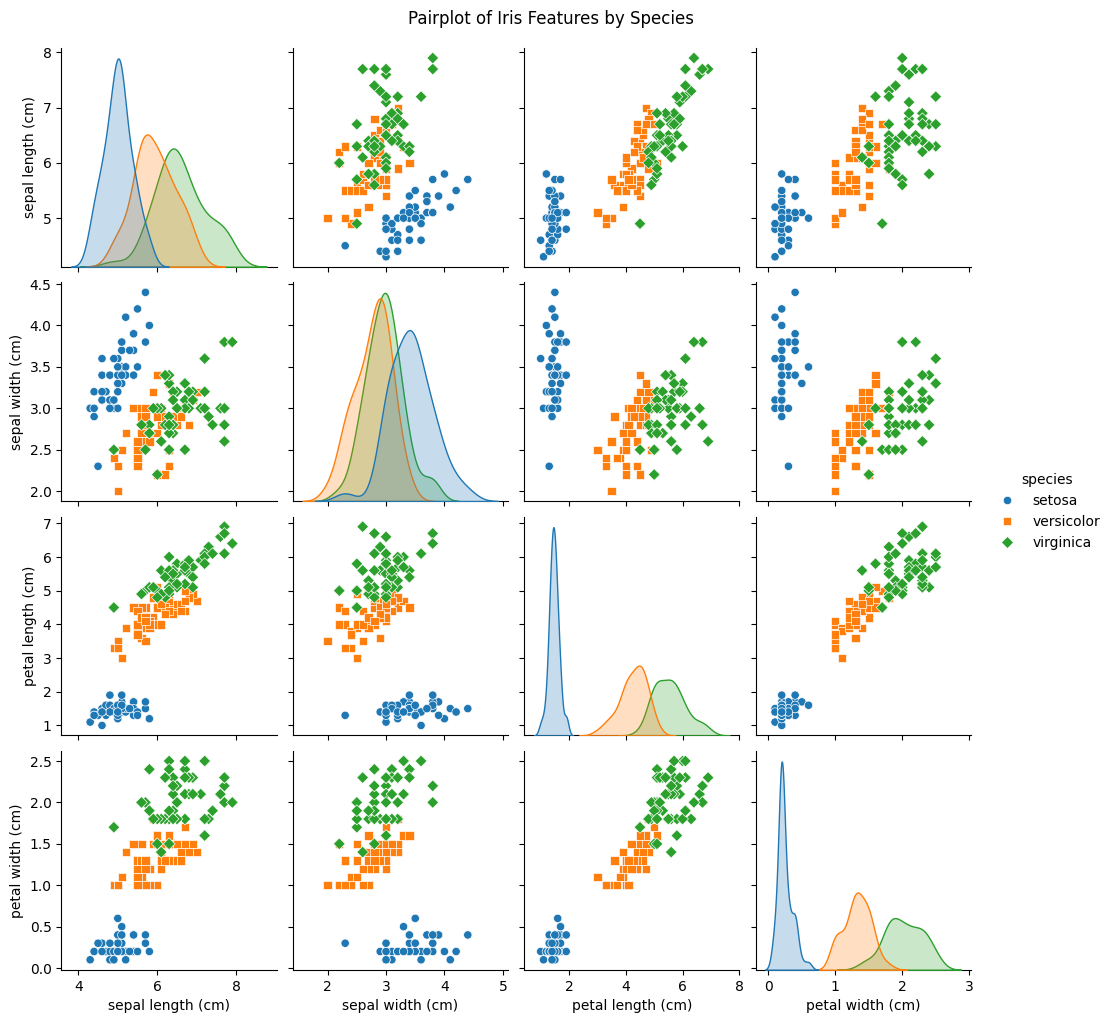

In [37]:
# Pairplot to visualize feature relationships
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

Training and Testing Datasets

In [38]:
#import train_test_split library
from sklearn.model_selection import train_test_split

Why? stratify=y ensures:

Balanced Classes: Each species (setosa, versicolor, virginica) appears in the same proportions in both train and test sets.

Reliable Metrics: Prevents bias (e.g., one species dominating the test set).

In [13]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train.shape

(120, 4)

In [15]:
X_test.shape

(30, 4)

In [16]:
y_train.shape

(120,)

In [17]:
y_test.shape

(30,)

Define My Model

In [39]:
#Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

Why? max_depth=3 prevents overfitting:

Simplicity: Limits complex splits that memorize noise.

Interpretability: Fewer levels = easier to explain (e.g., "Petal width ≤ 0.8 → setosa").

In [40]:
# Initialize and train the Decision Tree
iris_dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
iris_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Make Predictions: predict y using X_test

In [41]:
y_pred_dt = iris_dt_clf.predict(X_test)

Evaluate The Model

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [43]:
#Check Acuracy Score
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.97


What It Means: The model correctly predicts 97% of test samples.

In [44]:
#Check Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Classification Report Breakdown
The report evaluates the performance of the model (Decision Tree) across the three iris species:

Precision:

- Virginica: 9% of predicted "virginica" were wrong (false positives).

- Others: Flawless precision (100%).

Recall:

- Versicolor: 10% of actual versicolor were misclassified (false negatives).

- Others: Perfect recall.

F1-Score:

- Balanced metric for imbalanced classes (here, classes are equal, so F1 ≈ accuracy).

Support: 

- Equal samples per class (no bias).

Accuracy (0.97): 97% overall correct predictions.

Macro Avg (0.97): Mean of metrics across classes (good for balanced data).

Weighted Avg (0.97): Accounts for class sizes (identical here to macro).

Key Takeaway:

Model excels at setosa (perfect scores).

Struggles slightly with versicolor (90% recall) and virginica (91% precision).

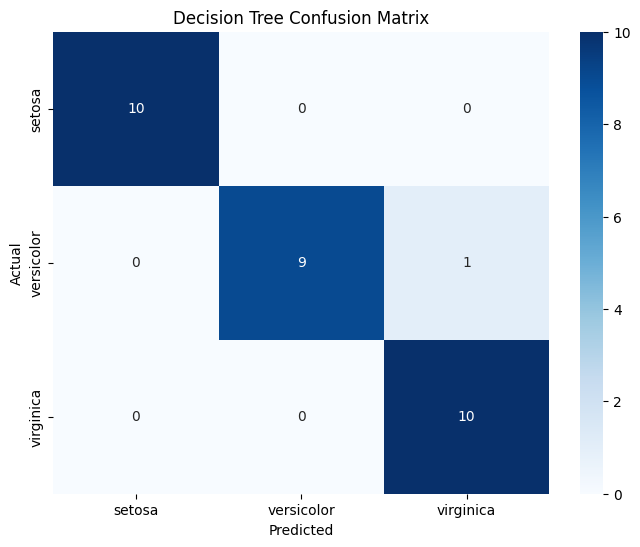

In [45]:
#Check Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', 
            cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

What It Shows:

Diagonal (Blue): Correct predictions (high counts = good).

Off-Diagonal: Errors (misclassifications).

The cell for (versicolor, virginica) = 1:
→ 1 versicolor was misclassified as virginica (matches the 90% recall for versicolor).

Why It Matters:

Visualizes where errors occur (e.g., versicolor ↔ virginica confusion).

Helps diagnose class-specific issues (e.g., feature engineering for overlapping classes).

Visualize The Decision Tree

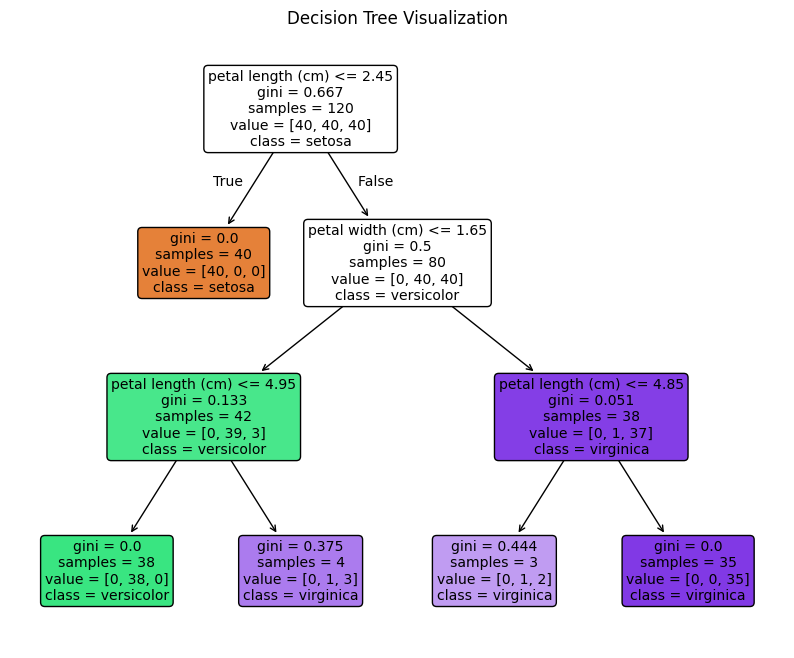

In [46]:
plt.figure(figsize=(10, 8))
plot_tree(iris_dt_clf, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Interpreting Decision Tree Visualization

Visualization: The tree shows that petal length and width are the most important features.

Decision Path: The tree makes decisions primarily based on petal measurements.

Petal measurements are more important than sepal measurements for classification

Setosa is the most easily distinguishable species

Advantages of Using Decision Tree: Easy interpretation and the visualization of the decision process.

Disadvantage: It can easily overfit if depth isn't limited.

Results and Interpretations

1. Accuracy Score

Accuracy Score measures the proportion of correct predictions out of all predictions made.

Calculation:
Accuracy = (True Positives + True Negatives) / Total Predictions

Interpretation: Decision Tree: 0.97 (97%)

The Decision Tree correctly classified 97% of test samples which is an excelllent score.

Note: Accuracy can be misleading with imbalanced datasets but it's not an issue here since Iris classes are perfectly balanced.

2. Classification Report: this report contains three key metrics for each class:

a) Precision: measures the number of all correct predictions for a class.

Calculation: Precision = True Positives / (True Positives + False Positives)

Interpretation: High precision means when the model predicts a class, it's likely correct.

Example: virginica precision is 0.91, 91% of "virginica" predictions were correct.


b) Recall (Sensitivity) is the measures of all actual instances of a class, that is, how many were correctly identified.

Calculation: Recall = True Positives / (True Positives + False Negatives)

Interpretation: High recall means the model finds most instances of a class.

Example: If versicolor recall is 0.90, the model found 90% of all versicolor flowers.

c) F1-Score measures harmonic mean of precision and recall (balances both metrics).

Calculation: F1 = 2 * (Precision * Recall) / (Precision + Recall)

Interpretation: Single metric combining precision and recall. Values close to 1 indicate excellent performance.


Key Notes:

The model show perfect (1.00) scores for setosa

Versicolor and virginica show slightly lower scores (0.95 range)

The "support" column shows equal class distribution (10 samples each)

3. Confusion Matrix

Confusion Matrix is a table showing actual vs predicted classifications:

Interpretations: Rows represent actual classes. Columns represent predicted classes.

Diagonal cells (top-left to bottom-right) show correct predictions. Off-diagonal cells show misclassifications

Key Notes From The Models:

Perfect classification for setosa and  virginica (all 10 correct)

1 versicolor misclassified as virginica